# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

Then we can compare this to how it was with scikit-learn. Still workin with the hand written numbers dataset. 

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 12:47:06.744225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
# downloading the dataset, and separate X and y and keeping the dataset in full as 'data'
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

/home/coder/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# convert labels to one-hot encoding - making a numerical label/index

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [4]:
y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

We do this because computers don't understand strings, have to make it numerical.

Can see the first value in y_train is an array showing a "3" because the 1 is in the "3s" spot within this dataset. 

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [5]:
# define architecture 784x256x128x10
model = Sequential() # neural network is now called model, sequential aka feedforward neural network 
model.add(Dense(256, # adding a 'dense' layer, dense means fully connected, of 256 nodes with input of 784  
                input_shape=(784,), # 784 pixels, input shape, is coming from the data 
                activation="relu")) # the relu activation function, can modify to "sigmoid" for logistic function 
model.add(Dense(128, # adding 2nd hidden layer of 128 nodes and don't need to define input shape 
                activation="relu"))
model.add(Dense(10, # output layer, 10 possible output classes 
                activation="softmax")) # fancy logistic regression function which gives probability of each output summing to 1 

2023-03-17 12:58:31.752772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [7]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

Don't want to learn too quickly or too slowly. Can adjust and tweek to optimize  

In [8]:
# train model using SGD
sgd = SGD(0.01) 
# compiles down into graph structure to more easily work with the data 
model.compile(loss="categorical_crossentropy", # technical name of the loss function we've been working with
              optimizer=sgd, # what we defined above 
              metrics=["accuracy"]) # metric we're trying to improve is accuracy. Could change to recall, precision, etc. 

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [10]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32) # don't update weights after every image, do it every 32 images - to avoid overfitting 

Epoch 1/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1972 - accuracy: 0.9442
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1731 - accuracy: 0.9505
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1541 - accuracy: 0.9559
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1392 - accuracy: 0.9602
Epoch 5/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9642
Epoch 6/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1147 - accuracy: 0.9677
Epoch 7/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9698
Epoch 8/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0969 - accuracy: 0.9723
Epoch 9/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9746
Epoch 10/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.083

## Visualise using ```matplotlib```

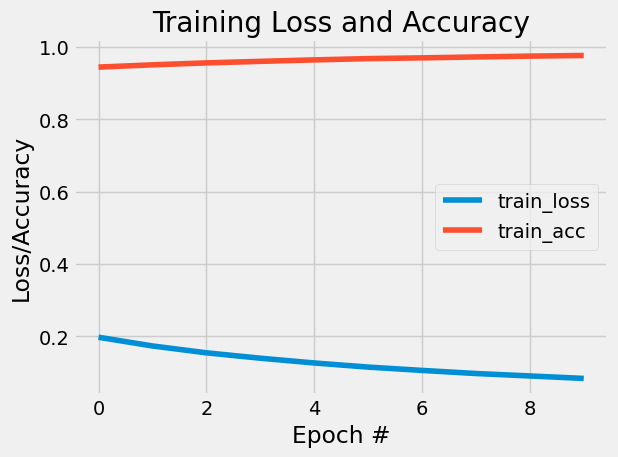

In [12]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [13]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 1s 2ms/step


In [20]:
print(classification_report(y_test.argmax(axis=1), # ask for largest value in the array to make our classification report 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_])) # list comprehension here, take list of label names to use 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1354
           1       0.97      0.99      0.98      1563
           2       0.97      0.96      0.97      1373
           3       0.97      0.96      0.97      1477
           4       0.98      0.96      0.97      1349
           5       0.95      0.96      0.96      1241
           6       0.96      0.99      0.98      1395
           7       0.97      0.97      0.97      1518
           8       0.97      0.95      0.96      1349
           9       0.96      0.96      0.96      1381

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too